In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.sparse as sc
import scipy.sparse.linalg as la

%matplotlib inline

# 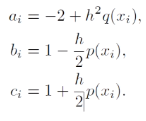

# 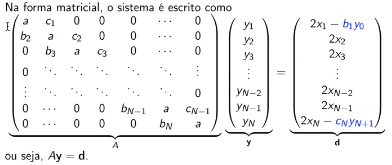

In [2]:
def PVF(l, alpha, beta, p, q, f, n): #caso geral (muda a construção da mariz)
    #Discretizando o intervalo
    x = np.linspace(0, l, n+2)
    xi = x[1:-1]
    h = (l)/(n+1)
    h2 = h**2
    
    #Cria matriz
    a = -2 * np.ones((n,)) + h2 * q(xi) 
    b = np.ones((n,)) - h/2 * p(xi)
    c = np.ones((n,)) + h/2 * p(xi)
    
    A = np.diag(a) + np.diag(b[1:], -1) + np.diag(c[:-1], 1)
    
    F = h2 * np.ones((n,)) * f(xi)
    F[0] -= alpha * b[0]
    F[-1] -= beta * c[-1]
    y = np.zeros((n+2,))
    y[0] = alpha
    y[-1] = beta
    
    #Montando e resolvendo o sistema linear
    y[1:-1] = np.linalg.solve(A, F)
    return y, x, A

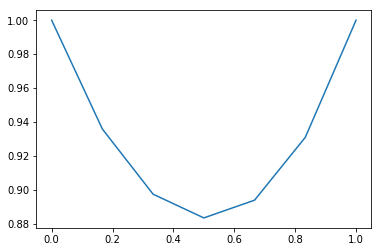

In [3]:
# ky'' - x**2y' - y = 0
# k = 1
# p(x) = - x**2
# q(x) = - 1
# f(x) = 0
# Obs: essa implementação considera que o termo que multiplica y'' é 1, se for outro valor, devemos dividir por esse valor para garantir que y'' esteja sozinho

l = 1
alpha = 1
beta = 1
p = lambda x: - x**2
q = lambda x: - 1
f = lambda x: 0

n = 5
y, x, A = PVF(l, alpha, beta, p, q, f, n)
plt.plot(x, y)

In [7]:
iA = np.linalg.inv(A)
print(iA)

[[-0.80363917 -0.62382549 -0.45374751 -0.29126228 -0.13831634]
 [-0.63106245 -1.26791446 -0.92223391 -0.59198552 -0.28112554]
 [-0.47295333 -0.95024569 -1.42533409 -0.91492748 -0.43448611]
 [-0.32153328 -0.64601641 -0.96900121 -1.27756704 -0.6066985 ]
 [-0.16774054 -0.33701998 -0.50551775 -0.66649331 -0.80965892]]


In [6]:
eig = np.linalg.eig(iA)
print(eig)

(array([-3.51717648, -0.97903952, -0.49315068, -0.32958199, -0.26516501]), array([[ 2.78271950e-01,  4.81204741e-01, -5.55447845e-01,
        -4.81204741e-01,  2.78271950e-01],
       [ 4.86281332e-01,  4.85392913e-01,  3.87897448e-16,
         4.85392913e-01, -4.86281332e-01],
       [ 5.72261648e-01,  2.85021291e-03,  5.65830048e-01,
        -2.85021291e-03,  5.72261648e-01],
       [ 5.11968425e-01, -5.03118536e-01, -3.04776566e-16,
        -5.03118536e-01, -5.11968425e-01],
       [ 3.10644694e-01, -5.28866082e-01, -6.09355436e-01,
         5.28866082e-01,  3.10644694e-01]]))
